In [16]:
#Importing packages
import pandas as pd
import pymysql
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import folium
from folium import plugins
from folium.features import DivIcon
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as smf
import plotly.plotly as py
import plotly.graph_objs as go
from scipy.stats import norm
import math
from sklearn.model_selection import train_test_split
#Query Executer
def getRes(query):
    df = pd.read_sql(query, con=db)
    return df

In [2]:
#DB Connection
db = pymysql.connect(host='localhost', port=3306, user='root', passwd='MyNewPass', db='chicagotaxidb')

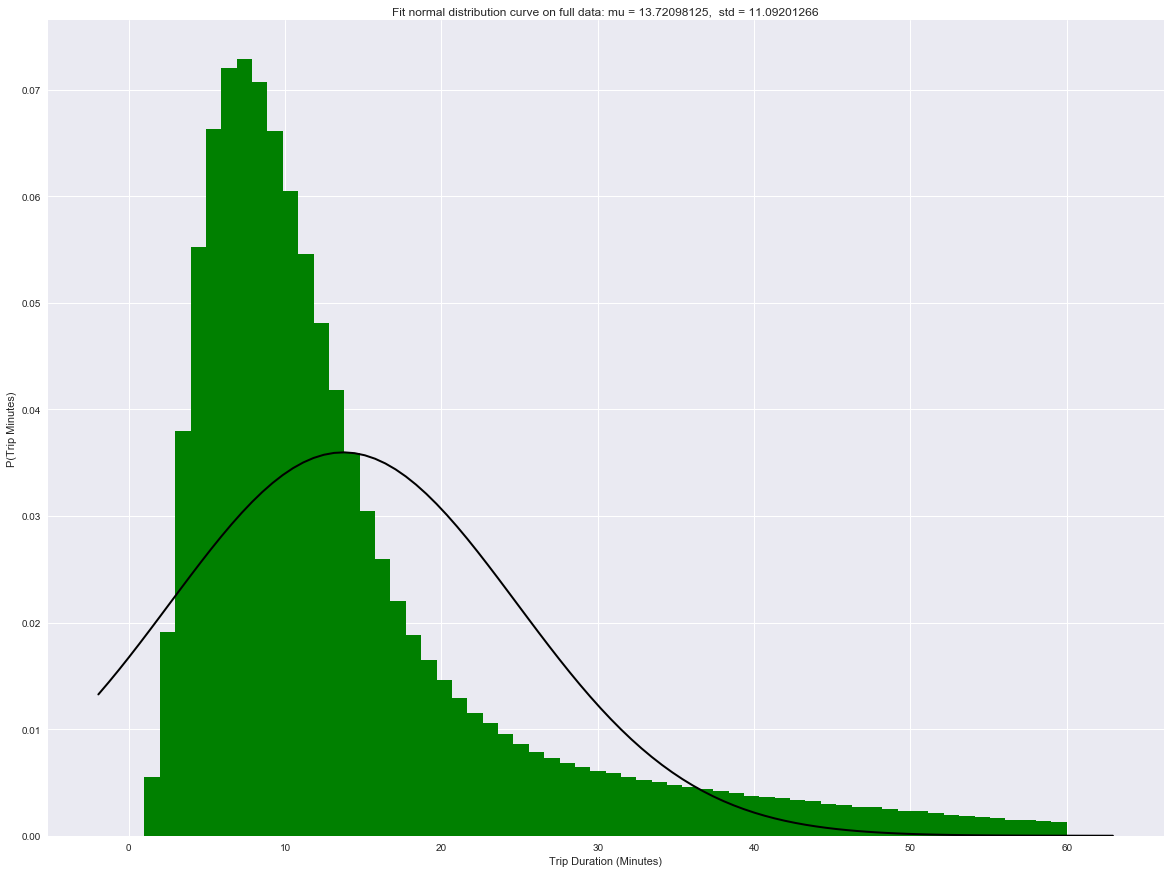

In [6]:
#Question 1
tma = getRes('select * from trip_min_all;')

fig = plt.figure(figsize=(20,15))
# Generate some data for this demonstration.
data = tma['trip_min']

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins= 60,normed=True, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit normal distribution curve on full data: mu = %.8f,  std = %.8f" % (mu, std)
plt.xlabel('Trip Duration (Minutes)')
plt.ylabel('P(Trip Minutes)')
plt.title(title)
plt.show()

In [22]:
#Question 2
taxitime_data = getRes('select * from trip_min_all')
taxi_train_data, taxi_test_data = train_test_split(taxitime_data, test_size=0.2)


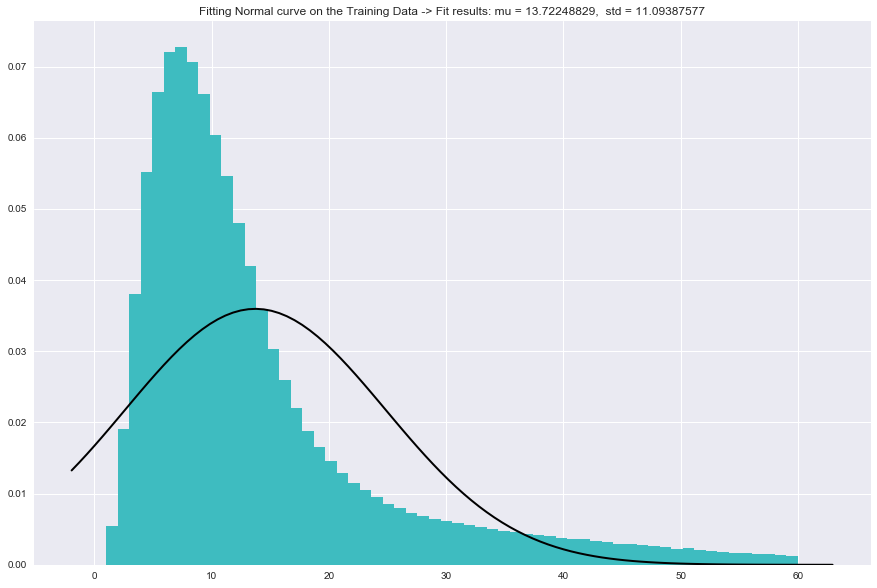

In [25]:
#Plottning Train Data and fitting Normal Distribution model
fig = plt.figure(figsize=(15,10))
# Generate some data for this demonstration.
odata = taxi_train_data['trip_min']

# Fit a normal distribution to the data:
mu, std = norm.fit(odata)

# Plot the histogram.
plt.hist(odata, bins= 60,normed=True, color='#3EBCC0')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fitting Normal curve on the Training Data -> Fit results: mu = %.8f,  std = %.8f" % (mu, std)
plt.title(title)

plt.show()

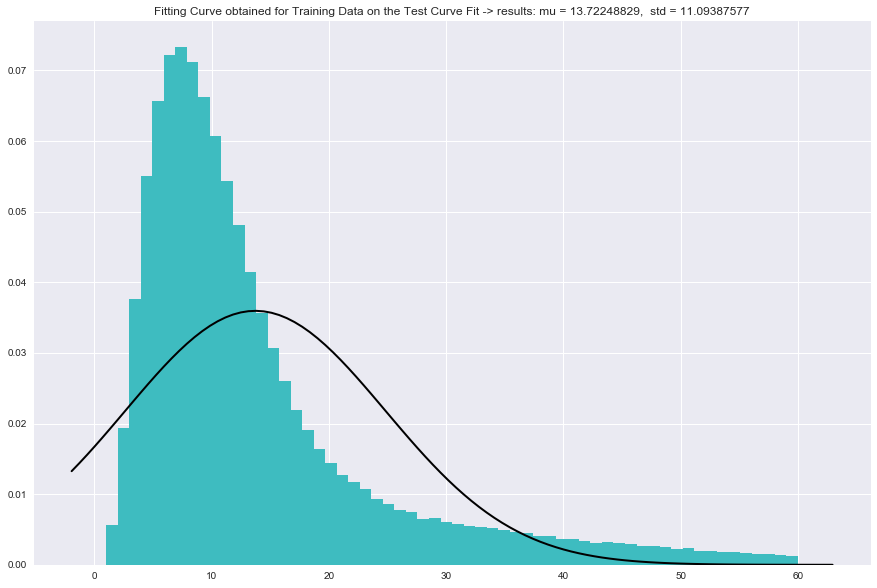

In [27]:
#Plotting Test data and plotting Normal Distribution Curve generated from training data
fig = plt.figure(figsize=(15,10))
# Generate some data for this demonstration.
testdata = taxi_test_data['trip_min']

# Plot the histogram.
plt.hist(testdata, bins= 60,normed=True, color='#3EBCC0')

# Plot the PDF.
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 100)
# p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fitting Curve obtained for Training Data on the Test Curve Fit -> results: mu = %.8f,  std = %.8f" % (mu, std)
plt.title(title)

plt.show()

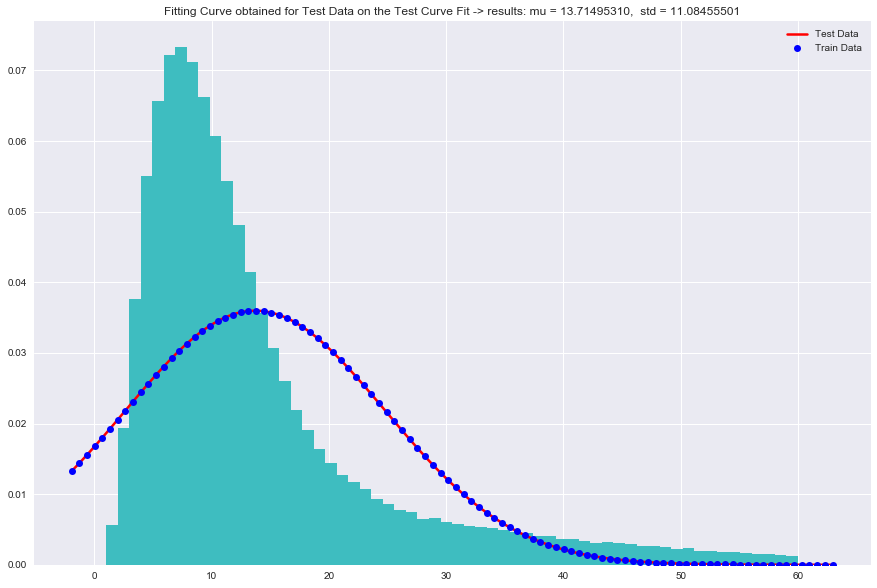

In [31]:
#Plotting test data and comparing the normal distribution curve between training and test Data
fig = plt.figure(figsize=(15,10))
# Generate some data for this demonstration.
testdata = taxi_test_data['trip_min']

# Plot the histogram.
plt.hist(testdata, bins= 60,normed=True, color='#3EBDC0')

mu_test, std_test = norm.fit(testdata)

# Plot the PDF.
xmin, xmax = plt.xlim()
xtest = np.linspace(xmin, xmax, 100)
ptest = norm.pdf(xtest, mu_test, std_test)
test_line,= plt.plot(xtest, ptest,'r-' ,linewidth=2.5,label = "Test Data")
train_line,= plt.plot(x, p, 'bo', linewidth=0.1,label = "Train Data")
plt.legend(handles=[test_line, train_line])
title = "Fitting Curve obtained for Test Data on the Test Curve Fit -> results: mu = %.8f,  std = %.8f" % (mu_test, std_test)
plt.title(title)

plt.show()

In [18]:
#Question 3
q2 = getRes('select distinct (Pickup_Community_Area) from c_taxi where Dropoff_Community_Area = 8;')
all_areas = list(set(q2['Pickup_Community_Area']))
modes = []
freq = []
avgs = []
l = []
lens = []
for i in range(len(all_areas)):
    query = 'select Trip_Seconds/60 from c_taxi where Pickup_Community_Area = ' +str(all_areas[i]) +' and Dropoff_Community_Area = 8;'
    d = getRes(query)
    x = d['Trip_Seconds/60'].value_counts()
    modes.append(x.index[0])
    freq.append(x[x.index[0]])
    avgs.append(sum(d['Trip_Seconds/60'])/len(d))
    l.append(len(d))
    lens.append(len(d))

methods = []    
final = []
basis = []
for i in range(len(freq)):
    if freq[i] <= 10:
        final.append(math.floor(avgs[i]))
        methods.append('Average')
        basis.append(lens[i])
    else:
        final.append(modes[i])
        methods.append('Mode')
        basis.append(freq[i])

leave_times = []
for i in range(len(final)):
    temp = 60.0
    temp = temp - final[i]
    t = "1:" + str(math.floor(temp)) + ' PM'
    leave_times.append(t)

data = pd.DataFrame({'Area':all_areas,'Time to Reach':final,'Leaving Time':leave_times,'Method':methods,'Nrow/Freq':basis})

In [19]:
pickCo = getRes('select * from pickup_location')
pickName = getRes('select * from community')
comm_Meta = pd.merge(pickCo,pickName,left_on='Pickup_Community_Area',right_on='Community_Area')
finalData = pd.merge(data,comm_Meta,left_on='Area',right_on='Community_Area')
finalData

,Area,Leaving Time,Method,Nrow/Freq,Time to Reach,Pickup_Community_Area,Avg_P_Lat,Avg_P_Long,Community_Name,Community_Area
0,1,1:41 PM,Mode,21,19.0,1,42.009506,-87.670208,Rogers Park,1
1,2,1:34 PM,Average,133,26.0,2,42.001556,-87.695008,West Ridge,2
2,3,1:49 PM,Mode,218,11.0,3,41.965685,-87.655717,Uptown,3
3,4,1:39 PM,Mode,22,21.0,4,41.975091,-87.687479,Lincoln Square,4
4,5,1:43 PM,Mode,38,17.0,5,41.947840,-87.683792,North Center,5
5,6,1:49 PM,Mode,1400,11.0,6,41.944255,-87.654804,Lake View,6
6,7,1:51 PM,Mode,1916,9.0,7,41.921586,-87.645630,Lincoln Park,7
7,8,1:55 PM,Mode,28085,5.0,8,41.896073,-87.628055,Near North Side,8
8,9,1:30 PM,Average,2,30.0,9,42.007613,-87.813781,Edison Park,9
9,10,1:34 PM,Average,18,26.0,10,41.984981,-87.804514,Norwood Park,10


In [35]:
finalData.to_csv('Q3.csv')

In [36]:
def getTaxiFlow(data):
    m = folium.Map(location=[41.881832,-87.623177],zoom_start=10)
    attr = {'fill': '#007DEF', 'font-weight': 'bold', 'font-size': '24'}

    #col = ["#00ffff","#00e5e5","#00cccc","#00b2b2","#009999",]
    #col = ["#FF0000","#FF6600","#FFEE00","#99FF00","#00FF00"]
    for dt in range(len(data)):
        tempdt = data.iloc[dt]
        
        latLongdata = [[float(tempdt['Avg_P_Lat']), float(tempdt['Avg_P_Long'])],[41.896073,-87.628055]]
        folium.PolyLine(latLongdata,color = 'black'
        ).add_to(m)
        #pickup
        popText = str(str(tempdt["Community_Name"]) + " | Time to leave :" + str(tempdt['Leaving Time']) + " | Duration : " + str(tempdt['Time to Reach']))
        folium.Marker(
        location = [float(tempdt['Avg_P_Lat']), float(tempdt['Avg_P_Long'])],
        popup = popText,
        icon = folium.Icon(color = "red")
        ).add_to(m)
    #Dropoff
    folium.Marker(
    location =  [41.896073,-87.628055],
    popup = "Near North Side",
    icon = folium.Icon(color = "green")
    ).add_to(m)
    return m

In [37]:
#Click on red marker to see which community area is it , Suggested time to leave and travel time to Near North Side
getTaxiFlow(finalData)